In [46]:
# imports
import pandas as pd
import geopandas as gpd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt

# no max rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [47]:
#Tables included in census table:
# Means of Transportation to Work (NHGIS code:  ALU1),
# Time of Departure to Go to Work (NHGIS code:  ALU2)

# load census data
census_data = pd.read_csv("/Users/elizabethpysher/spoke/data/census_mode_transport_time_leaving_to_work/nhgis0004_ds244_20195_tract.csv",encoding = "ISO-8859-1")

In [48]:
# check shape
census_data.shape

(74001, 116)

In [49]:
#check head
census_data.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,CONCITA,AIANHHA,RES_ONLYA,TRUSTA,AIHHTLI,AITS,ANRCA,CBSAA,CSAA,METDIVA,MEMI,NECTAA,CNECTAA,NECTADIVA,UAA,CDCURRA,SLDUA,SLDLA,ZCTA5A,SUBMCDA,SDELMA,SDSECA,SDUNIA,UR,PCI,PUMA5A,GEOID,BTTRA,BTBGA,NAME_E,ALU1E001,ALU1E002,ALU1E003,ALU1E004,ALU1E005,ALU1E006,ALU1E007,ALU1E008,ALU1E009,ALU1E010,ALU1E011,ALU1E012,ALU1E013,ALU1E014,ALU1E015,ALU1E016,ALU1E017,ALU1E018,ALU1E019,ALU1E020,ALU1E021,ALU2E001,ALU2E002,ALU2E003,ALU2E004,ALU2E005,ALU2E006,ALU2E007,ALU2E008,ALU2E009,ALU2E010,ALU2E011,ALU2E012,ALU2E013,ALU2E014,ALU2E015,NAME_M,ALU1M001,ALU1M002,ALU1M003,ALU1M004,ALU1M005,ALU1M006,ALU1M007,ALU1M008,ALU1M009,ALU1M010,ALU1M011,ALU1M012,ALU1M013,ALU1M014,ALU1M015,ALU1M016,ALU1M017,ALU1M018,ALU1M019,ALU1M020,ALU1M021,ALU2M001,ALU2M002,ALU2M003,ALU2M004,ALU2M005,ALU2M006,ALU2M007,ALU2M008,ALU2M009,ALU2M010,ALU2M011,ALU2M012,ALU2M013,ALU2M014,ALU2M015
0,G0100010020100,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020100,NaN,NaN,"Census Tract 201, Autauga County, Alabama",948,918,836,82,82,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,25,923,20,16,34,85,112,157,90,35,87,104,24,52,28,79,"Census Tract 201, Autauga County, Alabama",146,142,159,59,59,12,12,12,12,12,12,12,12,12,12,12,7,12,12,12,29,142,21,15,24,42,45,65,49,28,59,75,25,66,22,57
1,G0100010020200,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020200,NaN,NaN,"Census Tract 202, Autauga County, Alabama",733,724,690,34,29,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,724,47,20,69,132,121,133,57,12,20,15,4,0,67,27,"Census Tract 202, Autauga County, Alabama",99,97,93,28,27,7,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,97,26,18,40,57,57,53,44,12,19,20,8,12,53,25
2,G0100010020300,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020300,NaN,NaN,"Census Tract 203, Autauga County, Alabama",1732,1632,1406,226,121,33,72,0,0,0,0,0,0,0,0,0,33,0,34,0,33,1699,69,103,49,214,137,307,178,181,66,63,115,0,95,122,"Census Tract 203, Autauga County, Alabama",221,212,192,135,91,34,80,12,12,12,12,12,12,12,12,12,37,12,33,12,30,221,54,80,57,104,65,111,82,103,70,50,61,12,54,80
3,G0100010020400,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020400,NaN,NaN,"Census Tract 204, Autauga County, Alabama",1672,1511,1392,119,99,11,0,0,9,50,50,0,0,0,0,0,0,0,31,0,80,1592,94,36,68,226,232,303,196,83,53,57,50,0,50,144,"Census Tract 204, Autauga County, Alabama",224,183,182,58,56,15,12,12,15,68,68,12,12,12,12,12,12,12,51,12,42,213,75,29,55,81,89,90,85,52,34,54,38,12,45,62
4,G0100010020500,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020500,NaN,NaN,"Census Tract 205, Autauga County, Alabama",5407,5116,4580,536,535,0,1,0,0,92,92,0,0,0,0,0,35,0,68,0,96,5311,112,274,104,317,660,795,1131,590,128,317,138,63,276,406,"Census Tract 205, Autauga County, Alabama",470,512,498,292,292,19,4,19,19,121,121,19,19,19,19,19,55,19,64,19,77,490,100,191,91,184,251,232,327,315,138,209,104,71,173,282


In [50]:
# check datatypes
census_data.dtypes

GISJOIN       object
YEAR          object
STUSAB        object
REGIONA      float64
DIVISIONA    float64
STATE         object
STATEA         int64
COUNTY        object
COUNTYA        int64
COUSUBA      float64
PLACEA       float64
TRACTA         int64
BLKGRPA      float64
CONCITA      float64
AIANHHA      float64
RES_ONLYA    float64
TRUSTA       float64
AIHHTLI      float64
AITS         float64
ANRCA        float64
CBSAA        float64
CSAA         float64
METDIVA      float64
MEMI         float64
NECTAA       float64
CNECTAA      float64
NECTADIVA    float64
UAA          float64
CDCURRA      float64
SLDUA        float64
SLDLA        float64
ZCTA5A       float64
SUBMCDA      float64
SDELMA       float64
SDSECA       float64
SDUNIA       float64
UR           float64
PCI          float64
PUMA5A       float64
GEOID         object
BTTRA        float64
BTBGA        float64
NAME_E        object
ALU1E001       int64
ALU1E002       int64
ALU1E003       int64
ALU1E004       int64
ALU1E005     

In [51]:
#  Race Table Column: ALUCE001: Total is 6512
#  Hispanic or Latino Origin by Race Table Column: ALUKE001: Total is 6512
#  confirmed RACE_Total and Hisp_Race_Total are equal

# information from code book:
#  TRACTA:       Census Tract Code
#  Means of Transportation to Work (Workers 16 years and over) Table Columns
#    ALU1E001:    Total
#    ALU1E002:    Car, truck, or van
#    ALU1E003:    Car, truck, or van: Drove alone
#    ALU1E004:    Car, truck, or van: Carpooled
#    ALU1E011:    Public transportation (excluding taxicab): Bus
#    ALU1E012:    Public transportation (excluding taxicab): Subway or elevated rail
#    ALU1E013:    Public transportation (excluding taxicab): Long-distance train or commuter rail
#    ALU1E014:    Public transportation (excluding taxicab): Light rail, streetcar or trolley (carro p˙blico in Puerto Rico)
#    ALU1E015:    Public transportation (excluding taxicab): Ferryboat
#    ALU1E016:    Taxicab
#    ALU1E017:    Motorcycle
#    ALU1E018:    Bicycle
#    ALU1E019:    Walked
#    ALU1E020:    Other means
#    ALU1E021:    Worked from home
 
#  Time of Departure to Go to Work Table (Workers 16 years and over who did not work from home) Columns
#    ALU2E001:    Total
#    ALU2E002:    12:00 a.m. to 4:59 a.m.
#    ALU2E003:    5:00 a.m. to 5:29 a.m.
#    ALU2E004:    5:30 a.m. to 5:59 a.m.
#    ALU2E005:    6:00 a.m. to 6:29 a.m.
#    ALU2E006:    6:30 a.m. to 6:59 a.m.
#    ALU2E007:    7:00 a.m. to 7:29 a.m.
#    ALU2E008:    7:30 a.m. to 7:59 a.m.
#    ALU2E009:    8:00 a.m. to 8:29 a.m.
#    ALU2E010:    8:30 a.m. to 8:59 a.m.
#    ALU2E011:    9:00 a.m. to 9:59 a.m.
#    ALU2E012:    10:00 a.m. to 10:59 a.m.
#    ALU2E013:    11:00 a.m. to 11:59 a.m.
#    ALU2E014:    12:00 p.m. to 3:59 p.m.
#    ALU2E015:    4:00 p.m. to 11:59 p.m.

# filter to desired columns
cols = ['STATE','COUNTY','STATEA','COUNTYA','TRACTA',
        #  Means of Transportation to Work  Table Columns
        'ALU1E001','ALU1E002','ALU1E011','ALU1E012','ALU1E013','ALU1E014','ALU1E015','ALU1E016','ALU1E017','ALU1E018','ALU1E019','ALU1E020','ALU1E021',
        #  Time of Departure to Go to Work Table Columns
        'ALU2E001','ALU2E002','ALU2E003','ALU2E004','ALU2E005','ALU2E006','ALU2E007','ALU2E008','ALU2E009',
        'ALU2E010','ALU2E011','ALU2E012','ALU2E013','ALU2E014','ALU2E015']

# only include rows in New York State (ID 36) and New York County (ID 61)
rows = (census_data['STATEA']==36) & (census_data['COUNTYA']==61)

# create df with ny data and desired columns
ny_county_data = census_data.loc[rows,cols]

# check that state is only ny
assert set(ny_county_data['STATE'])== {'New York'}

# check that county is only ny
assert set(ny_county_data['COUNTY']) == {'New York County'}

In [52]:
# check shape
ny_county_data.shape

(288, 33)

In [53]:
# see how many nulls in columns
ny_county_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 45583 to 45870
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     288 non-null    object
 1   COUNTY    288 non-null    object
 2   STATEA    288 non-null    int64 
 3   COUNTYA   288 non-null    int64 
 4   TRACTA    288 non-null    int64 
 5   ALU1E001  288 non-null    int64 
 6   ALU1E002  288 non-null    int64 
 7   ALU1E011  288 non-null    int64 
 8   ALU1E012  288 non-null    int64 
 9   ALU1E013  288 non-null    int64 
 10  ALU1E014  288 non-null    int64 
 11  ALU1E015  288 non-null    int64 
 12  ALU1E016  288 non-null    int64 
 13  ALU1E017  288 non-null    int64 
 14  ALU1E018  288 non-null    int64 
 15  ALU1E019  288 non-null    int64 
 16  ALU1E020  288 non-null    int64 
 17  ALU1E021  288 non-null    int64 
 18  ALU2E001  288 non-null    int64 
 19  ALU2E002  288 non-null    int64 
 20  ALU2E003  288 non-null    int64 
 21  ALU2E004  

In [54]:
# rename columns to make more readable
col_names = {'TRACTA':'CENSUS_TRACT',
        #  Means of Transportation to Work  Table Columns
        'ALU1E001':'TRANSP_TOTAL','ALU1E002':'CAR','ALU1E011':'BUS','ALU1E012':'SUBWAY','ALU1E013':'TRAIN_RAIL',
        'ALU1E014':'TROLLEY','ALU1E015':'FERRY','ALU1E016':'TAXI','ALU1E017':'MOTORCYCLE','ALU1E018':'BICYCLE',
        'ALU1E019':'WALKED','ALU1E020':'TRANSP_OTHER','ALU1E021':'WORKED_FROM_HOME',
        #  Time of Departure to Go to Work Table Columns
        'ALU2E001':'DEPART_TOTAL','ALU2E002':'12AM_4:59AM','ALU2E003':'5AM_5:29AM','ALU2E004':'5:30AM_5:59AM',
        'ALU2E005':'6AM_6:29AM','ALU2E006':'6:30AM_6:59AM','ALU2E007':'7AM_7:29AM','ALU2E008':'7:30AM_7:59AM',
        'ALU2E009':'8AM_8:29AM','ALU2E010':'8:30AM_8:59AM','ALU2E011':'9AM_9:59AM','ALU2E012':'10AM_10:59AM',
        'ALU2E013':'11AM_11:59AM','ALU2E014':'12PM_3:59PM','ALU2E015':'4PM_11:59PM'}

ny_county_data = ny_county_data.rename(columns = col_names)

In [55]:
# create smaller df with only desired columns (as copy)
ny_county_slim = ny_county_data[['CENSUS_TRACT', 'TRANSP_TOTAL','CAR','BUS','SUBWAY','TRAIN_RAIL',
        'TROLLEY','FERRY','TAXI','MOTORCYCLE','BICYCLE','WALKED','TRANSP_OTHER','WORKED_FROM_HOME',
        'DEPART_TOTAL','12AM_4:59AM','5AM_5:29AM','5:30AM_5:59AM','6AM_6:29AM','6:30AM_6:59AM','7AM_7:29AM','7:30AM_7:59AM',
        '8AM_8:29AM','8:30AM_8:59AM','9AM_9:59AM','10AM_10:59AM','11AM_11:59AM','12PM_3:59PM','4PM_11:59PM']].copy()

# check head
ny_county_slim.head()

,CENSUS_TRACT,TRANSP_TOTAL,CAR,BUS,SUBWAY,TRAIN_RAIL,TROLLEY,FERRY,TAXI,MOTORCYCLE,BICYCLE,WALKED,TRANSP_OTHER,WORKED_FROM_HOME,DEPART_TOTAL,12AM_4:59AM,5AM_5:29AM,5:30AM_5:59AM,6AM_6:29AM,6:30AM_6:59AM,7AM_7:29AM,7:30AM_7:59AM,8AM_8:29AM,8:30AM_8:59AM,9AM_9:59AM,10AM_10:59AM,11AM_11:59AM,12PM_3:59PM,4PM_11:59PM
45583,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45584,201,1036,192,68,545,0,0,0,29,0,6,196,0,0,1036,0,1,44,166,27,140,65,228,130,45,135,0,43,12
45585,202,2889,158,222,1416,31,0,0,54,17,57,416,100,418,2471,96,0,37,257,98,433,193,287,253,448,155,3,170,41
45586,500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45587,600,2824,191,269,850,160,0,0,0,0,96,1140,1,117,2707,59,0,133,66,77,239,111,597,366,531,152,126,119,131


In [56]:
# look at dataframe
ny_county_slim.describe()

,CENSUS_TRACT,TRANSP_TOTAL,CAR,BUS,SUBWAY,TRAIN_RAIL,TROLLEY,FERRY,TAXI,MOTORCYCLE,BICYCLE,WALKED,TRANSP_OTHER,WORKED_FROM_HOME,DEPART_TOTAL,12AM_4:59AM,5AM_5:29AM,5:30AM_5:59AM,6AM_6:29AM,6:30AM_6:59AM,7AM_7:29AM,7:30AM_7:59AM,8AM_8:29AM,8:30AM_8:59AM,9AM_9:59AM,10AM_10:59AM,11AM_11:59AM,12PM_3:59PM,4PM_11:59PM
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,14288.555556,3080.524306,242.829861,188.604167,1565.156250,43.895833,10.322917,2.940972,79.732639,2.687500,69.611111,629.125000,24.017361,221.600694,2858.923611,34.892361,38.149306,33.725694,116.684028,120.663194,274.479167,287.798611,579.097222,432.857639,474.392361,141.836806,47.743056,144.180556,132.423611
std,8313.542304,1847.255857,198.190285,183.142439,1032.962082,52.133602,39.711721,9.996514,99.142076,11.562265,82.578195,568.779896,38.732124,173.732534,1729.907538,53.651919,64.185885,49.340435,111.939136,114.868541,207.419989,213.362154,411.159393,366.074787,357.322733,114.382257,59.531709,156.137465,120.944603
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7375.000000,1648.750000,102.750000,58.750000,764.750000,5.000000,0.000000,0.000000,8.000000,0.000000,7.000000,209.000000,0.000000,90.750000,1494.750000,0.000000,0.000000,0.000000,33.750000,46.750000,120.750000,133.000000,287.750000,172.000000,196.750000,62.750000,9.000000,34.000000,43.750000
50%,14401.500000,2884.500000,206.000000,138.000000,1436.000000,26.500000,0.000000,0.000000,45.000000,0.000000,46.000000,445.000000,10.000000,176.500000,2635.500000,16.000000,14.500000,18.000000,85.000000,85.000000,238.000000,246.000000,514.500000,314.000000,401.000000,116.500000,33.000000,99.500000,101.500000
75%,20925.750000,4283.250000,324.250000,270.500000,2219.750000,65.000000,0.000000,0.000000,108.250000,0.000000,96.500000,892.250000,31.250000,324.250000,3971.500000,45.250000,50.500000,43.000000,173.250000,168.000000,388.250000,388.250000,770.500000,614.000000,645.500000,196.000000,64.750000,197.250000,187.500000
max,31900.000000,9549.000000,1221.000000,1235.000000,5294.000000,293.000000,413.000000,79.000000,595.000000,120.000000,450.000000,3209.000000,297.000000,906.000000,8907.000000,358.000000,471.000000,303.000000,836.000000,873.000000,1232.000000,1318.000000,2587.000000,1868.000000,1914.000000,718.000000,455.000000,901.000000,634.000000


In [57]:
# check how many rows with zero transportation and departure data
print("rows missing TRANSP_TOTAL: ", sum(ny_county_slim['TRANSP_TOTAL']==0))
print("rows missing DEPART_TOTAL: ", sum(ny_county_slim['DEPART_TOTAL']==0))

# look at zero race and income data
missing_transp = ny_county_slim.loc[ny_county_slim['DEPART_TOTAL']==0,:]
missing_transp

# 100 is 1.00 Statue of Liberty & Ellis Island
# 500 is 5.00 Governors Island
# 8602 is 86.02 East River
# 14300 is Central Park
# 29700 is Inwood
# 31100 is East River
# 31900 is Battery Park

rows missing TRANSP_TOTAL:  7
rows missing DEPART_TOTAL:  7


,CENSUS_TRACT,TRANSP_TOTAL,CAR,BUS,SUBWAY,TRAIN_RAIL,TROLLEY,FERRY,TAXI,MOTORCYCLE,BICYCLE,WALKED,TRANSP_OTHER,WORKED_FROM_HOME,DEPART_TOTAL,12AM_4:59AM,5AM_5:29AM,5:30AM_5:59AM,6AM_6:29AM,6:30AM_6:59AM,7AM_7:29AM,7:30AM_7:59AM,8AM_8:29AM,8:30AM_8:59AM,9AM_9:59AM,10AM_10:59AM,11AM_11:59AM,12PM_3:59PM,4PM_11:59PM
45583,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45586,500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45667,8602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45725,14300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45862,29700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45867,31100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45870,31900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
# define race columns
transp_cols = ['CAR','BUS','SUBWAY','TRAIN_RAIL','TROLLEY','FERRY','TAXI','MOTORCYCLE','BICYCLE',
               'WALKED','TRANSP_OTHER','WORKED_FROM_HOME']

# define income columns
depart_cols = ['12AM_4:59AM','5AM_5:29AM','5:30AM_5:59AM','6AM_6:29AM','6:30AM_6:59AM','7AM_7:29AM','7:30AM_7:59AM',
        '8AM_8:29AM','8:30AM_8:59AM','9AM_9:59AM','10AM_10:59AM','11AM_11:59AM','12PM_3:59PM','4PM_11:59PM']

# create columns for race percentages
for transport in transp_cols:
    col_name = transport + '_PERCENT'
    ny_county_slim[col_name] = (ny_county_slim[transport]/ny_county_slim['TRANSP_TOTAL'])*100

# create columns for income percentages
for time in depart_cols:
    col_name = time + '_PERCENT'
    ny_county_slim[col_name] = (ny_county_slim[time]/ny_county_slim['DEPART_TOTAL'])*100

# check columns were created properly
ny_county_slim.columns

Index(['CENSUS_TRACT', 'TRANSP_TOTAL', 'CAR', 'BUS', 'SUBWAY', 'TRAIN_RAIL',
       'TROLLEY', 'FERRY', 'TAXI', 'MOTORCYCLE', 'BICYCLE', 'WALKED',
       'TRANSP_OTHER', 'WORKED_FROM_HOME', 'DEPART_TOTAL', '12AM_4:59AM',
       '5AM_5:29AM', '5:30AM_5:59AM', '6AM_6:29AM', '6:30AM_6:59AM',
       '7AM_7:29AM', '7:30AM_7:59AM', '8AM_8:29AM', '8:30AM_8:59AM',
       '9AM_9:59AM', '10AM_10:59AM', '11AM_11:59AM', '12PM_3:59PM',
       '4PM_11:59PM', 'CAR_PERCENT', 'BUS_PERCENT', 'SUBWAY_PERCENT',
       'TRAIN_RAIL_PERCENT', 'TROLLEY_PERCENT', 'FERRY_PERCENT',
       'TAXI_PERCENT', 'MOTORCYCLE_PERCENT', 'BICYCLE_PERCENT',
       'WALKED_PERCENT', 'TRANSP_OTHER_PERCENT', 'WORKED_FROM_HOME_PERCENT',
       '12AM_4:59AM_PERCENT', '5AM_5:29AM_PERCENT', '5:30AM_5:59AM_PERCENT',
       '6AM_6:29AM_PERCENT', '6:30AM_6:59AM_PERCENT', '7AM_7:29AM_PERCENT',
       '7:30AM_7:59AM_PERCENT', '8AM_8:29AM_PERCENT', '8:30AM_8:59AM_PERCENT',
       '9AM_9:59AM_PERCENT', '10AM_10:59AM_PERCENT', '11AM_11:59A

In [59]:
# looking at specific tract to see what's what
ny_county_slim.loc[(ny_county_slim['CENSUS_TRACT']==10300),:]

,CENSUS_TRACT,TRANSP_TOTAL,CAR,BUS,SUBWAY,TRAIN_RAIL,TROLLEY,FERRY,TAXI,MOTORCYCLE,BICYCLE,WALKED,TRANSP_OTHER,WORKED_FROM_HOME,DEPART_TOTAL,12AM_4:59AM,5AM_5:29AM,5:30AM_5:59AM,6AM_6:29AM,6:30AM_6:59AM,7AM_7:29AM,7:30AM_7:59AM,8AM_8:29AM,8:30AM_8:59AM,9AM_9:59AM,10AM_10:59AM,11AM_11:59AM,12PM_3:59PM,4PM_11:59PM,CAR_PERCENT,BUS_PERCENT,SUBWAY_PERCENT,TRAIN_RAIL_PERCENT,TROLLEY_PERCENT,FERRY_PERCENT,TAXI_PERCENT,MOTORCYCLE_PERCENT,BICYCLE_PERCENT,WALKED_PERCENT,TRANSP_OTHER_PERCENT,WORKED_FROM_HOME_PERCENT,12AM_4:59AM_PERCENT,5AM_5:29AM_PERCENT,5:30AM_5:59AM_PERCENT,6AM_6:29AM_PERCENT,6:30AM_6:59AM_PERCENT,7AM_7:29AM_PERCENT,7:30AM_7:59AM_PERCENT,8AM_8:29AM_PERCENT,8:30AM_8:59AM_PERCENT,9AM_9:59AM_PERCENT,10AM_10:59AM_PERCENT,11AM_11:59AM_PERCENT,12PM_3:59PM_PERCENT,4PM_11:59PM_PERCENT
45685,10300,1456,53,0,563,89,9,12,58,0,41,518,51,62,1394,10,25,0,20,78,91,124,285,245,357,94,39,12,14,3.64011,0.0,38.667582,6.112637,0.618132,0.824176,3.983516,0.0,2.815934,35.576923,3.502747,4.258242,0.71736,1.7934,0.0,1.43472,5.595409,6.527977,8.895265,20.444763,17.575323,25.609756,6.743185,2.797704,0.860832,1.004304


In [60]:
# load census tracts map
# obtained from https://data.cityofnewyork.us/City-Government/2010-Census-Tracts/fxpq-c8ku
tract_gdf = gpd.read_file('/Users/elizabethpysher/spoke/data/2010_Census_Tracts/geo_export_85c202c5-6ec9-493e-b0ec-a13efa26758d.shp')

In [61]:
# create only Manhattan
ny_county_tracts_gdf = tract_gdf.loc[tract_gdf['boro_name']=='Manhattan'].copy()

# check shape
ny_county_tracts_gdf.shape

(288, 12)

In [62]:
# check format of census shape file key 
set(ny_county_tracts_gdf['ct2010'])

{'000100',
 '000201',
 '000202',
 '000500',
 '000600',
 '000700',
 '000800',
 '000900',
 '001001',
 '001002',
 '001200',
 '001300',
 '001401',
 '001402',
 '001501',
 '001502',
 '001600',
 '001800',
 '002000',
 '002100',
 '002201',
 '002202',
 '002400',
 '002500',
 '002601',
 '002602',
 '002700',
 '002800',
 '002900',
 '003001',
 '003002',
 '003100',
 '003200',
 '003300',
 '003400',
 '003601',
 '003602',
 '003700',
 '003800',
 '003900',
 '004000',
 '004100',
 '004200',
 '004300',
 '004400',
 '004500',
 '004700',
 '004800',
 '004900',
 '005000',
 '005200',
 '005400',
 '005501',
 '005502',
 '005600',
 '005700',
 '005800',
 '005900',
 '006000',
 '006100',
 '006200',
 '006300',
 '006400',
 '006500',
 '006600',
 '006700',
 '006800',
 '006900',
 '007000',
 '007100',
 '007200',
 '007300',
 '007400',
 '007500',
 '007600',
 '007700',
 '007800',
 '007900',
 '008000',
 '008100',
 '008200',
 '008300',
 '008400',
 '008601',
 '008602',
 '008603',
 '008700',
 '008800',
 '008900',
 '009000',
 '009100',

In [63]:
# check format of census data key
set(ny_county_slim['CENSUS_TRACT'])

{100,
 201,
 202,
 500,
 600,
 700,
 800,
 900,
 1001,
 1002,
 1200,
 1300,
 1401,
 1402,
 1501,
 1502,
 1600,
 1800,
 2000,
 2100,
 2201,
 2202,
 2400,
 2500,
 2601,
 2602,
 2700,
 2800,
 2900,
 3001,
 3002,
 3100,
 3200,
 3300,
 3400,
 3601,
 3602,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4700,
 4800,
 4900,
 5000,
 5200,
 5400,
 5501,
 5502,
 5600,
 5700,
 5800,
 5900,
 6000,
 6100,
 6200,
 6300,
 6400,
 6500,
 6600,
 6700,
 6800,
 6900,
 7000,
 7100,
 7200,
 7300,
 7400,
 7500,
 7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8200,
 8300,
 8400,
 8601,
 8602,
 8603,
 8700,
 8800,
 8900,
 9000,
 9100,
 9200,
 9300,
 9400,
 9500,
 9600,
 9700,
 9800,
 9900,
 10000,
 10100,
 10200,
 10300,
 10400,
 10601,
 10602,
 10800,
 10900,
 11000,
 11100,
 11201,
 11202,
 11203,
 11300,
 11401,
 11402,
 11500,
 11600,
 11700,
 11800,
 11900,
 12000,
 12100,
 12200,
 12400,
 12500,
 12600,
 12700,
 12800,
 12900,
 13000,
 13100,
 13200,
 13300,
 13400,
 13500,
 13600,
 13700,
 13

In [64]:
# update census tract file key format to string
ny_county_tracts_gdf['ct2010'] = ny_county_tracts_gdf['ct2010'].apply(str)

# update  census data key format to match census shape file key format
ny_county_slim['CENSUS_TRACT'] = ny_county_slim['CENSUS_TRACT'].apply(str)
ny_county_slim['CENSUS_TRACT'] = ny_county_slim['CENSUS_TRACT'].apply(lambda x: x.zfill(6))

# check keys are the same format and values before joining
set(ny_county_tracts_gdf['ct2010']) == set(ny_county_slim['CENSUS_TRACT'])

True

In [65]:
# join on census tract ID
tracts_census_data = ny_county_tracts_gdf.merge(ny_county_slim, how='inner', left_on='ct2010',right_on='CENSUS_TRACT')

# check shape
tracts_census_data.shape

(288, 67)

In [66]:
# examine head
tracts_census_data.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,CENSUS_TRACT,TRANSP_TOTAL,CAR,BUS,SUBWAY,TRAIN_RAIL,TROLLEY,FERRY,TAXI,MOTORCYCLE,BICYCLE,WALKED,TRANSP_OTHER,WORKED_FROM_HOME,DEPART_TOTAL,12AM_4:59AM,5AM_5:29AM,5:30AM_5:59AM,6AM_6:29AM,6:30AM_6:59AM,7AM_7:29AM,7:30AM_7:59AM,8AM_8:29AM,8:30AM_8:59AM,9AM_9:59AM,10AM_10:59AM,11AM_11:59AM,12PM_3:59PM,4PM_11:59PM,CAR_PERCENT,BUS_PERCENT,SUBWAY_PERCENT,TRAIN_RAIL_PERCENT,TROLLEY_PERCENT,FERRY_PERCENT,TAXI_PERCENT,MOTORCYCLE_PERCENT,BICYCLE_PERCENT,WALKED_PERCENT,TRANSP_OTHER_PERCENT,WORKED_FROM_HOME_PERCENT,12AM_4:59AM_PERCENT,5AM_5:29AM_PERCENT,5:30AM_5:59AM_PERCENT,6AM_6:29AM_PERCENT,6:30AM_6:59AM_PERCENT,7AM_7:29AM_PERCENT,7:30AM_7:59AM_PERCENT,8AM_8:29AM_PERCENT,8:30AM_8:59AM_PERCENT,9AM_9:59AM_PERCENT,10AM_10:59AM_PERCENT,11AM_11:59AM_PERCENT,12PM_3:59PM_PERCENT,4PM_11:59PM_PERCENT
0,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200306,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",009800,4557,375,20,1389,52,0,8,24,0,19,2068,21,581,3976,18,66,30,0,130,306,297,1140,909,790,33,49,63,145,8.229098,0.438885,30.480579,1.141102,0.0,0.175554,0.526662,0.0,0.416941,45.380733,0.460829,12.749616,0.452716,1.65996,0.754527,0.000000,3.269618,7.696177,7.469819,28.672032,22.862173,19.869215,0.829980,1.232394,1.584507,3.646881
1,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",010200,63,7,2,14,0,0,0,0,0,4,18,4,14,49,0,0,0,0,0,8,4,3,9,10,0,2,4,9,11.111111,3.174603,22.222222,0.000000,0.0,0.000000,0.000000,0.0,6.349206,28.571429,6.349206,22.222222,0.000000,0.00000,0.000000,0.000000,0.000000,16.326531,8.163265,6.122449,18.367347,20.408163,0.000000,4.081633,8.163265,18.367347
2,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",010400,569,10,5,211,0,0,5,0,0,1,244,0,93,476,0,0,0,18,0,21,58,78,143,137,0,13,8,0,1.757469,0.878735,37.082601,0.000000,0.0,0.878735,0.000000,0.0,0.175747,42.882250,0.000000,16.344464,0.000000,0.00000,0.000000,3.781513,0.000000,4.411765,12.184874,16.386555,30.042017,28.781513,0.000000,2.731092,1.680672,0.000000
3,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860712,"POLYGON ((-73.98412 40.75484, -73.98460 40.754...",011300,51,0,0,17,0,0,0,0,0,0,34,0,0,51,0,0,0,3,0,0,0,9,13,18,5,3,0,0,0.000000,0.000000,33.333333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,66.666667,0.000000,0.000000,0.000000,0.00000,0.000000,5.882353,0.000000,0.000000,0.000000,17.647059,25.490196,35.294118,9.803922,5.882353,0.000000,0.000000
4,1,1013000,Manhattan,I,013000,130,MN40,Upper East Side-Carnegie Hill,3805,1.918145e+06,5807.972956,"POLYGON ((-73.96148 40.77432, -73.96194 40.773...",013000,1546,291,219,365,25,0,0,140,0,16,320,68,102,1444,0,24,16,12,35,120,179,298,339,217,95,53,56,0,18.822768,14.165589,23.609314,1.617076,0.0,0.000000,9.055627,0.0,1.034929,20.698577,4.398448,6.597671,0.000000,1.66205,1.108033,0.831025,2.423823,8.310249,12.396122,20.637119,23.476454,15.027701,6.578947,3.670360,3.878116,0.000000


<AxesSubplot:>

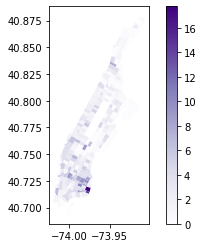

In [67]:
tracts_census_data.plot(column='BICYCLE_PERCENT', cmap='Purples',legend=True)

<AxesSubplot:>

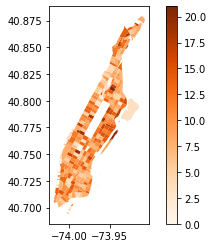

In [68]:
tracts_census_data.plot(column='7:30AM_7:59AM_PERCENT', cmap='Oranges',legend=True)

In [69]:
# save csv with transportation mode and departure time data, census tracts
tracts_census_data.to_csv(path_or_buf='/Users/elizabethpysher/spoke/data/census_transportation_departure_time_clean.csv')